In [25]:
# !pip install pytesseract

# # https://github.com/madmaze/pytesseract

In [26]:
# !pip install tesseract

In [27]:
#  for CL: tesseract imagename outputbase [options...] [configfile...]

In [1]:
import os
os.getcwd()

'c:\\Users\\jnicolow\\Documents\\courses\\fall2024\\ICS-661\\final project\\digitalize_handwritten'

In [2]:
from tqdm import tqdm
from glob import glob
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pytesseract.pytesseract.tesseract_cmd  = r'C:\Users\jnicolow\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

In [9]:
def add_gaussian_noise(img:Image, mean=0, std=50) -> Image:
    img_array = np.asarray(img, dtype=np.float32)
    noise = np.random.normal(mean, std, img_array.shape)
    noisy_img_array = np.clip(img_array + noise, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_img_array)


def drop_resolution(img, scale_factor=8):

    new_width = img.width // scale_factor
    new_height = img.height // scale_factor
    low_res_img = img.resize((new_width, new_height), Image.Resampling.BOX)  # Downscale
    restored_img = low_res_img.resize(img.size, Image.Resampling.NEAREST)   # Upscale
    
    return restored_img

def crop(img:Image, size=300) -> Image:
    width, height = img.size
    left = (width - size) // 2
    top = (height - size) // 2
    right = left + size
    bottom = top + size

    return img.crop((left, top, right, bottom))

def get_text_SmartDoc(fn, scale_factor=None, plot=False, ocr=True):
    img = Image.open(fn)  
    img = img.rotate(-90, expand=True) # the images for this datasets are all sideways
    if not scale_factor is None:
        img = drop_resolution(img, scale_factor=scale_factor)
    if plot:
        fig, axes = plt.subplots(nrows=1, ncols=2)
        axes[0].imshow(crop(img))
        axes[0].axis('off')  
        axes[1].imshow(img)
        axes[1].axis('off') 
        plt.show()
    if ocr:
        return pytesseract.image_to_string(img)


def save_SmartDoc_ocr(fn, save_path, scale_falctor=None, plot=False):
    text = get_text_SmartDoc(fn, scale_factor=scale_falctor, plot=plot)
    file_path = os.path.join(save_path, f"{os.path.basename(fn).replace('.jpg', '')}.txt")
    with open(file_path, "w") as file:
        file.write(text)


save_path = r'C:\Users\jnicolow\Documents\courses\fall2024\ICS-661\final project\sampleDataset\ocr_output'
input_path = r'C:\Users\jnicolow\Documents\courses\fall2024\ICS-661\final project\sampleDataset\input_sample'

input_fns = glob(os.path.join(input_path, '*.jpg'))

# for input_fn in tqdm(input_fns):
#     save_SmartDoc_ocr(input_fn, save_path=save_path)



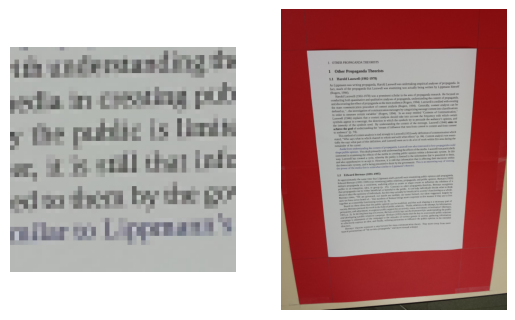

In [12]:
input_fns = glob(os.path.join(input_path, '*.jpg'))
input_fns[0]

get_text_SmartDoc(input_fns[0], plot=True, scale_factor=6, ocr=False)

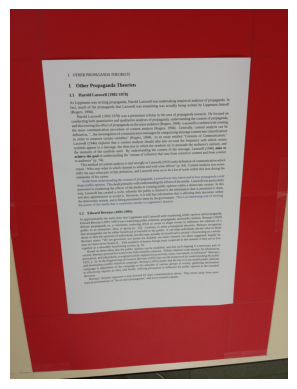

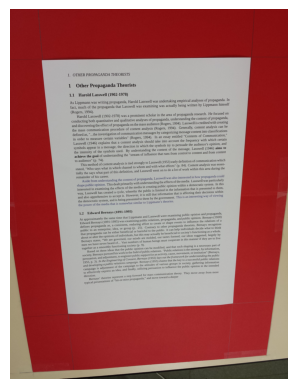

1. OTHER PROPAGANDA THEORISTS

1 Other Propaganda Theorists

1.1 Harold Lasswell (1902-1978)

As Lippmann was writing propaganda, H

arold Lasswell was undertaking empirical analyses of propaganda. In
fact, much of the propaganda that Lasswell was examining was ac

tually being written by Lippmann himself
(Rogers, 1994).

Harold Lasswell (1902-1978) was a prominent scholar in the area of propaganda research. He focused on
conducting both quantitative and qualitative analyses

of propaganda, understanding the content of propaganda,
and discovering the effect of propaganda on th

e mass audience (Rogers, 1994). Lasswell is credited with creating
the mass communication procedure of content ana

lysis (Rogers, 1994). Generally, content analysis can be
defined as, "...the investigation of communication messages by categorizing message content into classifications
in order to measure certain variables” (Rogers, 1994

). In an essay entitled "Contents of Communication,"
Lasswell (1946) explai

In [ ]:
img = Image.open(r'C:\Users\jnicolow\Documents\courses\fall2024\ICS-661\final project\sampleDataset\input_sample\00001.jpg')  # Replace with an actual image path
rotated_img = img.rotate(-90, expand=True)
plt.imshow(rotated_img)
plt.axis('off')  # Hide axes for better visualization
plt.show()

text = pytesseract.image_to_string(rotated_img)
print(text)

In [32]:
import os
def run_tesseract_on_images(input_directory, output_directory):
    # gets list of all files in directory: note needs to be in directory with all images
    files = [f for f in os.listdir(input_directory) if f.endswith('.png') or f.endswith('.jpg')]

    # opens files and extracts text and saves to txt
    for i in files:
        file_loc = input_directory + '/' + i
        img = Image.open(file_loc)
        text = pytesseract.image_to_string(img)
        text_name = output_directory + "ocr_" + i[:-4] + ".txt"
        with open(text_name,'w') as f: 
            f.write(text)

In [37]:
run_tesseract_on_images("data/IAM_database/formsA-D/", "OCR/final/IAM/formsAD/")

In [ ]:
run_tesseract_on_images("data/IAM_database/formsE-H/", "OCR/final/IAM/formsEH/")

In [ ]:
run_tesseract_on_images("data/IAM_database/formsI-Z", "OCR/final/IAM/formsIZ/")

In [ ]:
run_tesseract_on_images("data/BenthamDataset/Pages/", "/OCR/final/Bentham/")

# IAM Database

In [36]:
def run_tesseract_on_images(input_directory, output_directory):
    # gets list of all files in directory: note needs to be in directory with all images
    directories = [d for d in os.listdir(input_directory) if os.path.isdir(os.path.join(input_directory, d))]
    
    for directory in directories: 
        director = input_directory + '/' + directory
        dir = [d for d in os.listdir(director) if os.path.isdir(os.path.join(director, d))]
        #print(dir)
        for di in dir: 
            i = director + '/' + di
            files = [f for f in os.listdir(i) if f.endswith('.png') or f.endswith('.jpg')]
            whole_text = ""
            for id in files: 
                file_loc = i + "/" + id
                #print(file_loc)
                img = Image.open(file_loc)
                text = pytesseract.image_to_string(img)
                whole_text += text
            cleaned_text = whole_text.replace('\n', " ")
            #print(cleaned_text)
            #text_name = output_directory + '/' + "ocr_" + di + '.txt'
            text_name = ""
            if id[0] == "a" or id[0] <= "d":
                text_name = output_directory + 'formsAD/' + 'ocr_' + di + ".txt" 
            elif id[0] == 'e' or id[0] <= 'h':
                text_name = output_directory + 'formsEH/' + 'ocr_' + di + ".txt" 
            elif id[0] == 'i' or id[0] <= 'z':
                text_name = output_directory + 'formsIZ/' + 'ocr_' + di + ".txt" 
            #print(f"\n {text_name}")
            with open(text_name, 'w') as f: 
                f.write(cleaned_text)

run_tesseract_on_images("data/IAM_database/lines", "OCR/final/IAM/")